In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay

# Load dataset
file_path = './heart.csv'
data = pd.read_csv(file_path)

# Separate features and target variable
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing pipelines for both numeric and categorical data
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')  # Drop first to avoid dummy variable trap

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Fit the preprocessor to the data
preprocessor.fit(X)

# Transform the training data
X_transformed = preprocessor.transform(X)

# Get the feature names after transformation
numeric_feature_names = preprocessor.transformers_[0][1].get_feature_names_out(numerical_cols)
categorical_feature_names = preprocessor.transformers_[1][1].get_feature_names_out(categorical_cols)
feature_names = list(numeric_feature_names) + list(categorical_feature_names)

# Print the feature names to verify
print("Transformed feature names:")
print(feature_names)

# Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Define the Random Forest model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)




Transformed feature names:
['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up']


RandomForestClassifier(random_state=42)

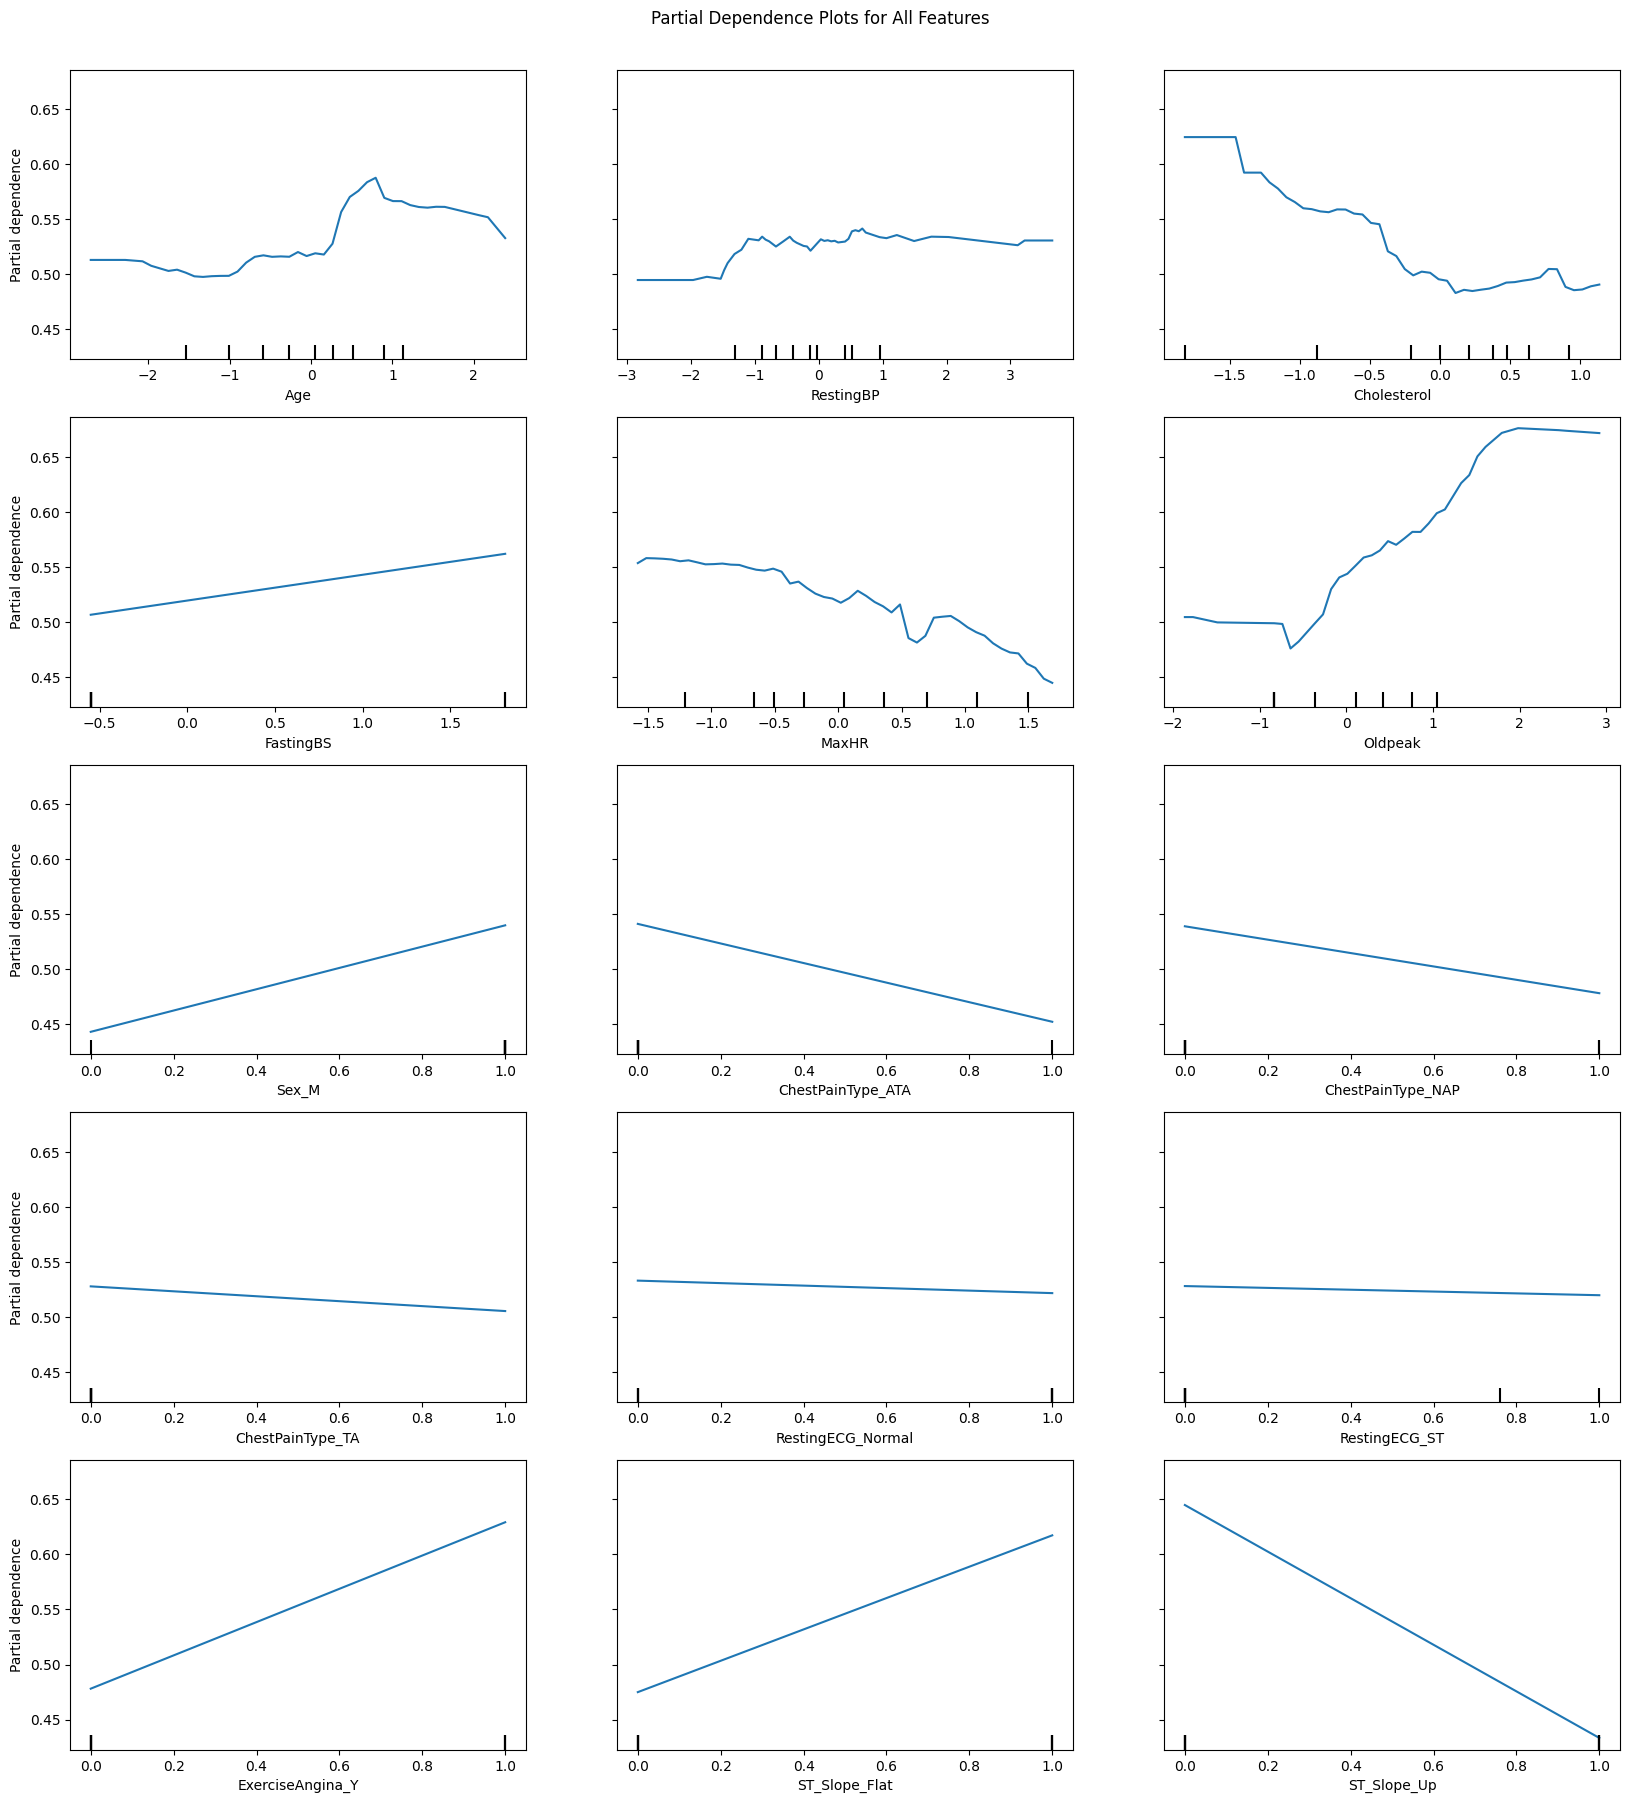

In [12]:
# Display Partial Dependence Plots for all features
fig, ax = plt.subplots(figsize=(20, 20))
display = PartialDependenceDisplay.from_estimator(model, X_test, features=range(X_test.shape[1]), feature_names=feature_names, grid_resolution=50, ax=ax)
plt.suptitle('Partial Dependence Plots for All Features')
plt.subplots_adjust(top=0.95)  # Adjust title position
plt.show()